# 2. Digitale Zusatzaufgabe: Erzeugung von Zufallszahlen

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2.1. Klausurwürfel von Professorin Müller und Professor Schmidt
### 2.1.1 Eigene Methode

In [2]:
dice_variables = [1, 2, 3, 4, 5]
dice_mueller = [2, 3, 3, 4, 4, 5]
dice_schmidt = [1, 1, 2, 2, 2, 3]

mueller_probabilities = [0, 1/6, 2/6, 2/6, 1/6]
schmidt_probabilities = [2/6, 3/6, 1/6, 0, 0]

In [3]:
number_of_rounds = 5000

mueller_experiment = []
schmidt_experiment = []

for i in range(number_of_rounds):
    index = random.randint(0,5)
    mueller_experiment.append(dice_mueller[index])
    schmidt_experiment.append(dice_schmidt[index])

In [4]:
def get_probability_of_samples(samples, variables):
    count_unique = [0]*len(variables)

    for i in range(len(count_unique)):
        count_unique[i] = samples.count(variables[i]) / len(samples)
        
    return count_unique

In [5]:
mueller_count_unique = get_probability_of_samples(mueller_experiment, dice_variables)
schmidt_count_unique = get_probability_of_samples(schmidt_experiment, dice_variables)

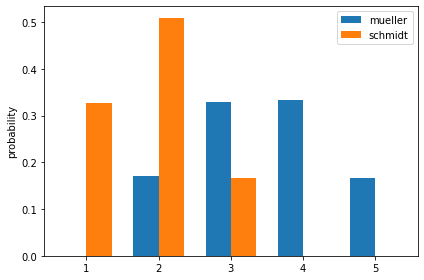

In [6]:
# plot with pyplot
fig, ax = plt.subplots()
labels = list(map(str, dice_variables))
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, mueller_count_unique, width, label="mueller")
rects2 = ax.bar(x + width/2, schmidt_count_unique, width, label="schmidt")
ax.set_ylabel('probability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

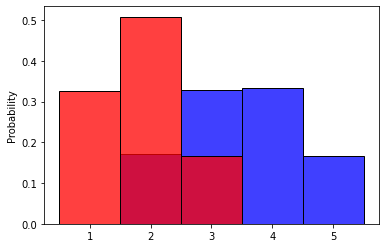

In [7]:
# plot with seaborn
sns.histplot(mueller_experiment, stat="probability", discrete=True, color='b', legend=True, multiple="layer")
sns.histplot(schmidt_experiment, stat="probability", discrete=True, color='r', legend=True, multiple="layer")
# set_xticks(np.unique(mueller_experiment))
plt.show()

### 2.1.2 Verwerfungsmethode (Accept Reject)

In [8]:
def accept_reject(dice_variables, dice_probabilities, n):
    
    def roll_dice(variables, probabillities):
        x = random.randint(0, len(variables)-1)
        y = random.uniform(0, 1)
        # accept
        if (y <= probabillities[x]):
            return variables[x]
        # reject: try again until accept
        else:
            return roll_dice(variables, probabillities)
    
    samples = []
    for i in range(n):
        samples.append(roll_dice(dice_variables, dice_probabilities))
    return samples

In [9]:
mueller_experiment_samples = accept_reject(dice_variables, mueller_probabilities, number_of_rounds)
mueller_experiment_probabilities = get_probability_of_samples(mueller_experiment_samples, dice_variables)

schmidt_experiment_samples = accept_reject(dice_variables, schmidt_probabilities, number_of_rounds)
schmidt_experiment_probabilities = get_probability_of_samples(schmidt_experiment_samples, dice_variables)

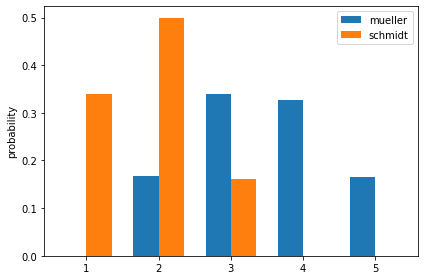

In [10]:
fig, ax = plt.subplots()
labels = list(map(str, dice_variables))
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, mueller_experiment_probabilities, width, label="mueller")
rects2 = ax.bar(x + width/2, schmidt_experiment_probabilities, width, label="schmidt")
ax.set_ylabel('probability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

### 2.1.3 Inversionsmethode

In [11]:
dice_variables = [1, 2, 3, 4, 5]
mueller_probabilities = [0, 1/6, 2/6, 2/6, 1/6]
schmidt_probabilities = [2/6, 3/6, 1/6, 0, 0]

In [12]:
# https://de.wikipedia.org/wiki/Inversionsmethode#Anwendung_bei_diskreter_Verteilung
def discrete_inverse_transform_sampling(variable, probabilities, n=1):
    samples = []
    for i in range(n):
        U = random.uniform(0, 1)
        if U <= probabilities[0]:
            samples.append(variable[0])
        else:
            for j in range(1, len(probabilities)):
                if U > sum(probabilities[:j]) and U < sum(probabilities[:j+1]):
                    samples.append(variable[j])
                    break
    return samples

In [13]:
mueller_experiment_samples = discrete_inverse_transform_sampling(dice_variables, mueller_probabilities, 5000)
mueller_experiment_probabilities = get_probability_of_samples(mueller_experiment_samples, dice_variables)

schmidt_experiment_samples = discrete_inverse_transform_sampling(dice_variables, schmidt_probabilities, 5000)
schmidt_experiment_probabilities = get_probability_of_samples(schmidt_experiment_samples, dice_variables)

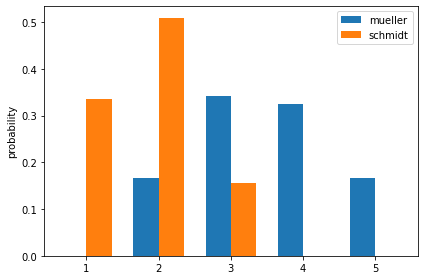

In [14]:
fig, ax = plt.subplots()
labels = list(map(str, dice_variables))
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, mueller_experiment_probabilities, width, label="mueller")
rects2 = ax.bar(x + width/2, schmidt_experiment_probabilities, width, label="schmidt")
ax.set_ylabel('probability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

## 2.2. Eigene Verteilung
Ideen: jeder eine eins (es kann sich keiner beschweren), gaußverteilung, notenverteilung aus vergangenenen klausuren)

In [15]:
# Ergebnis Prüfung Stochsatik in MSI AS im SS 20
dice_variables = [1, 2, 3, 4, 5]
own_probabilities = [10/17, 1/17, 1/17, 2/17, 3/17]

In [16]:
# Inversionmethode
own_experiment_samples = discrete_inverse_transform_sampling(dice_variables, own_probabilities, number_of_rounds)
own_experiment_probabilities = get_probability_of_samples(own_experiment_samples, dice_variables)

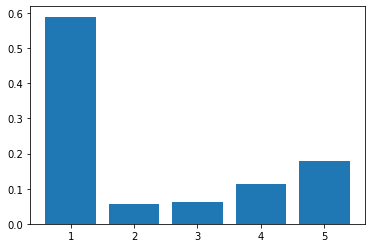

In [17]:
plt.bar(dice_variables, own_experiment_probabilities)
plt.show()

In [18]:
# Verteilung nach eigenem Empfinden

# Accept Reject
own_probabilities = [1/6, 2/6, 2/6, 1/6, 0]
own_experiment_samples = accept_reject(dice_variables, own_probabilities, number_of_rounds)
own_experiment_probabilities = get_probability_of_samples(own_experiment_samples, dice_variables)

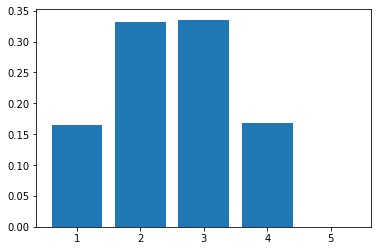

In [19]:
plt.bar(dice_variables, own_experiment_probabilities)
plt.show()